In [1]:
import pandas as pd
import numpy as np


In [2]:

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams

In [3]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [4]:
import seaborn as sb
sb.set_style('whitegrid')

In [31]:
from sklearn import tree

In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [6]:
df=pd.read_csv("Iris.csv")

In [7]:
df.drop('Id',axis=1,inplace=True)

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

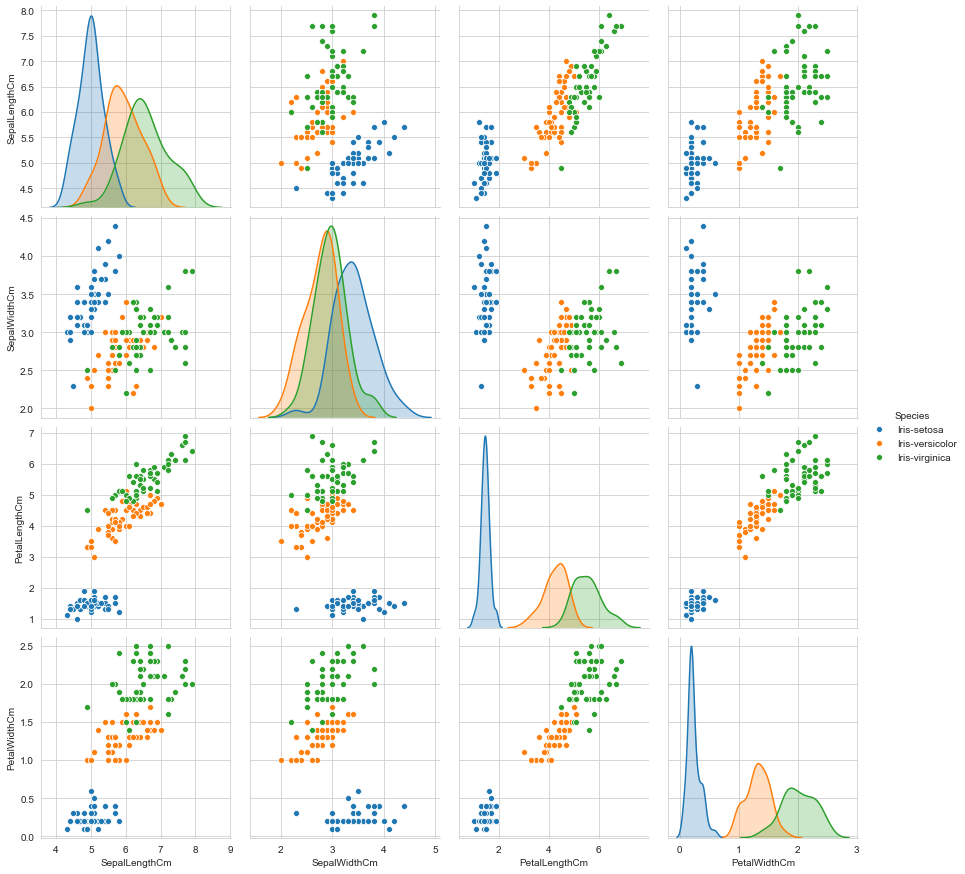

In [12]:
sb.pairplot(df,hue="Species",height=3);

In [13]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


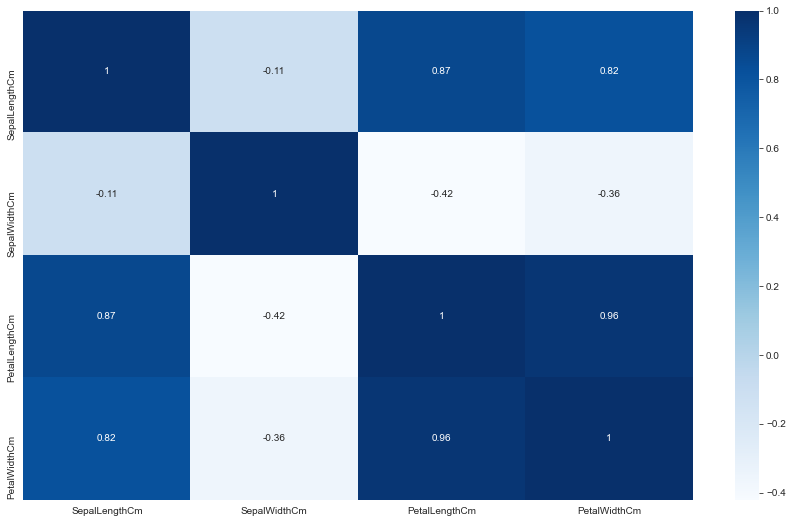

In [14]:
fig = plt.figure(figsize = (15,9))
sb.heatmap(df.corr(), cmap='Blues', annot = True);

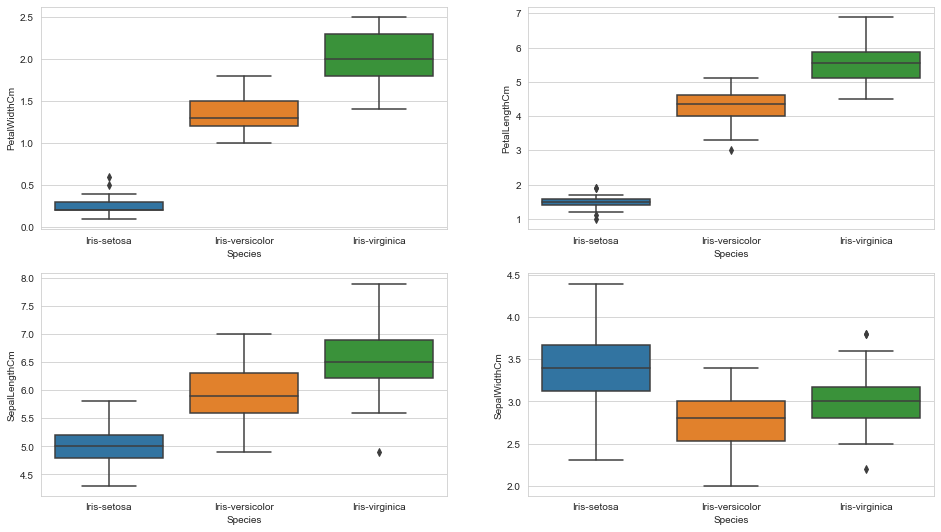

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sb.boxplot(  y="PetalWidthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 0])
sb.boxplot(  y="PetalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
sb.boxplot(  y="SepalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 0])
sb.boxplot(  y="SepalWidthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
col_list=list(df)

In [19]:
del col_list[-1:]

In [20]:
col_list

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [22]:
X=df[col_list]

In [23]:
y=df["Species"]

In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [44]:
from sklearn.model_selection import GridSearchCV

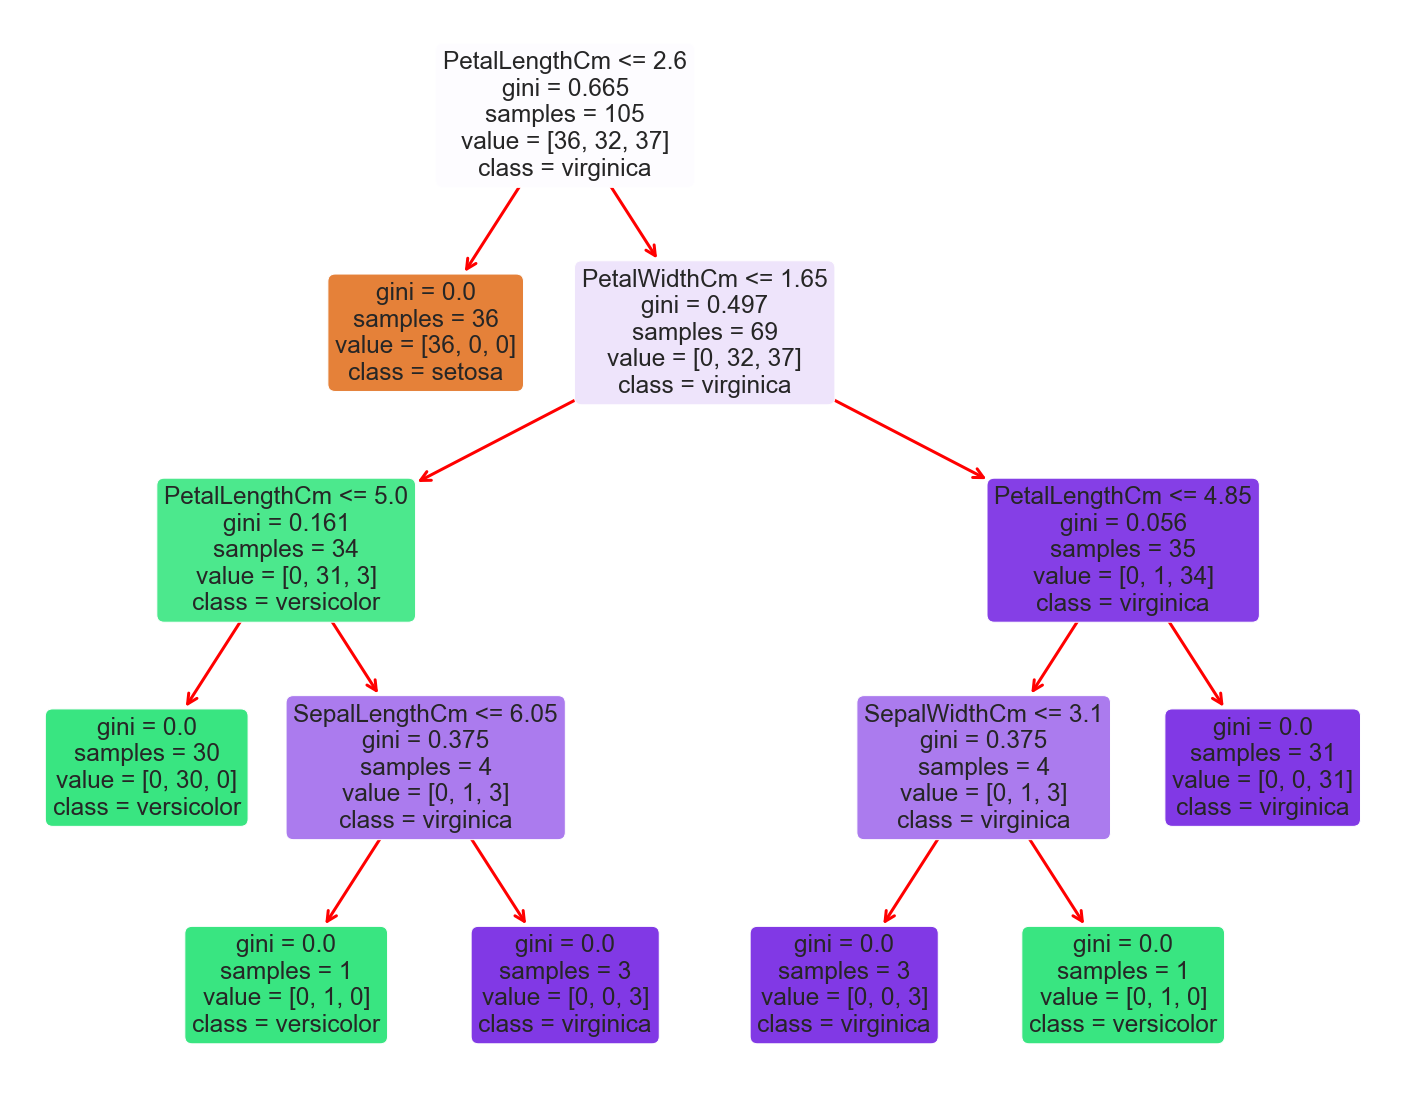

In [42]:
fig = plt.figure(figsize=(25,20))
out= tree.plot_tree(clf, 
                   feature_names=col_list,  
                   class_names=['setosa', 'versicolor', 'virginica'],
                   filled=True, rounded=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

In [45]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9733333333333334 {'max_depth': 3}


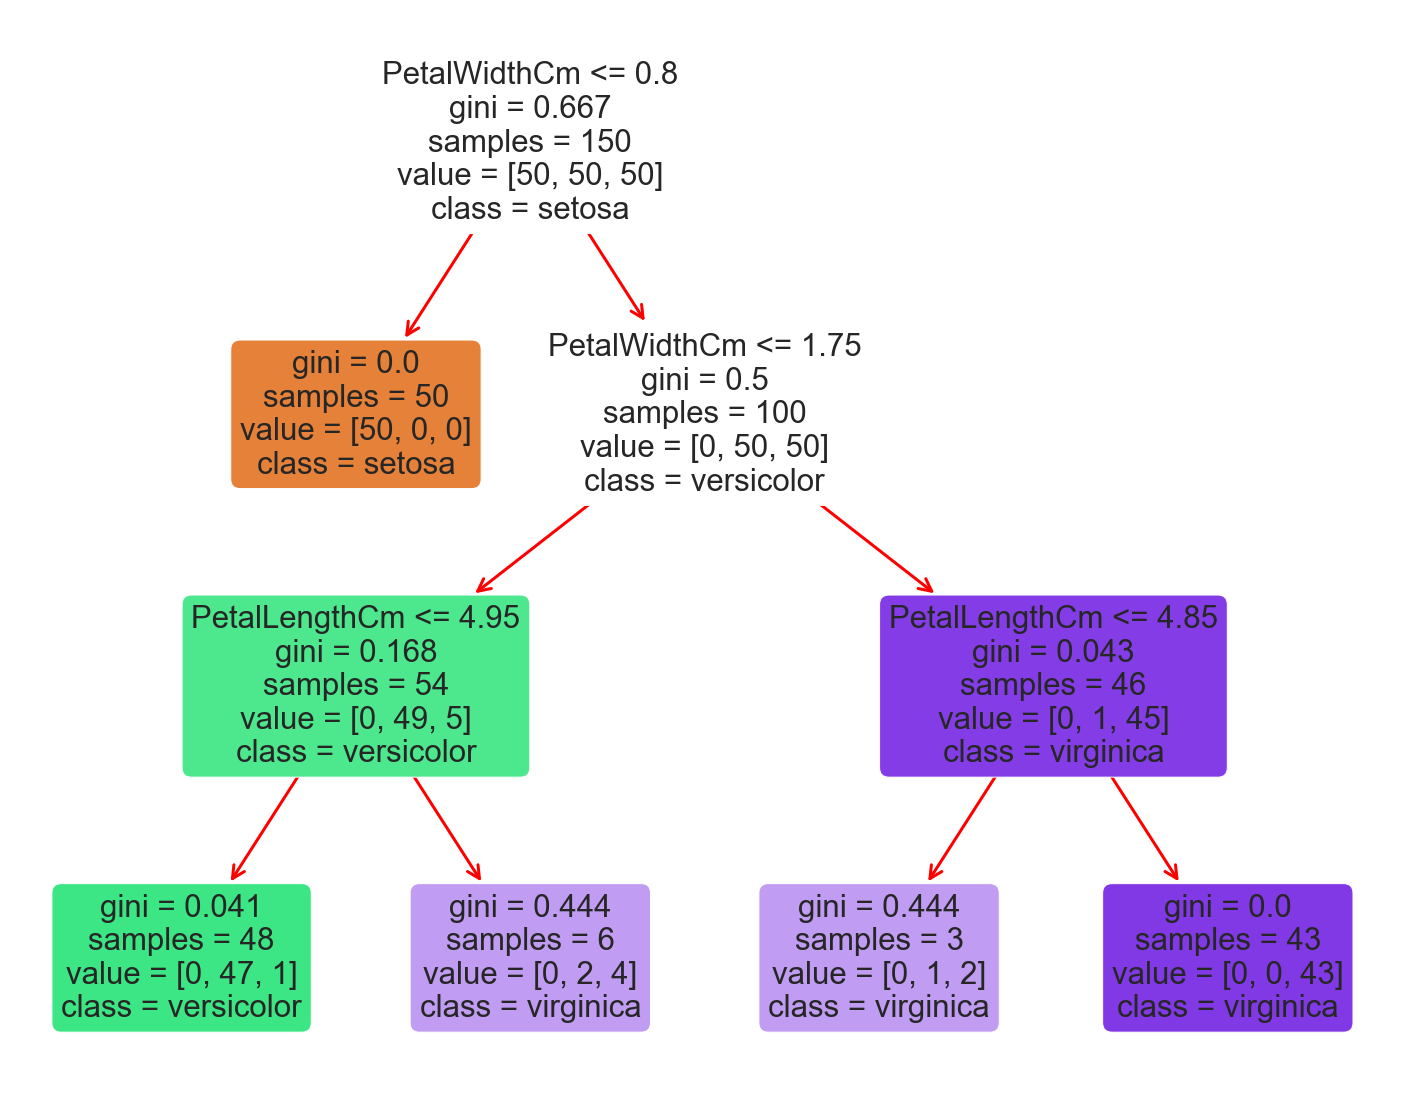

In [47]:
fig = plt.figure(figsize=(25,20))
out= tree.plot_tree(tree_model, 
                   feature_names=col_list,  
                   class_names=['setosa', 'versicolor', 'virginica'],
                   filled=True, rounded=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)